In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

In [5]:
data = pd.read_csv('Nat_Gas.csv')

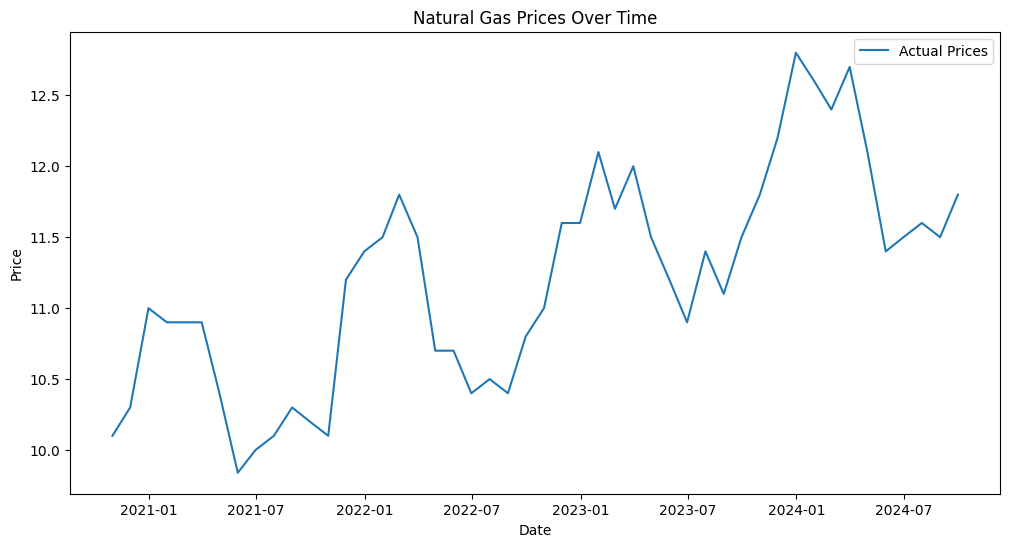

In [9]:
data['Dates'] = pd.to_datetime(data['Dates'], format='%Y-%m-%d')

# Display the data
plt.figure(figsize=(12, 6))
plt.plot(data['Dates'], data['Prices'], label='Actual Prices')
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [21]:
# Method to estimate prices
def estimate_price(date):
    model = LinearRegression()
    
    data['days_since_start'] = (data['Dates'] - data['Dates'].min()).dt.days

    model.fit(data[['days_since_start']], data['Prices'])

    # Estimate price for the given date
    days_since_start = (date - data['Dates'].min()).days
    estimated_price = model.predict([[days_since_start]])[0]
    
    return estimated_price


In [22]:
# Implementationn of the method created
input_date = datetime(2022, 1, 15)
estimated_price = estimate_price(input_date)
print(f'Estimated price on {input_date}: ${estimated_price:.2f}')


Estimated price on 2022-01-15 00:00:00: $10.86


c:\Users\Etudiant FST\.conda\envs\FaceRec\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


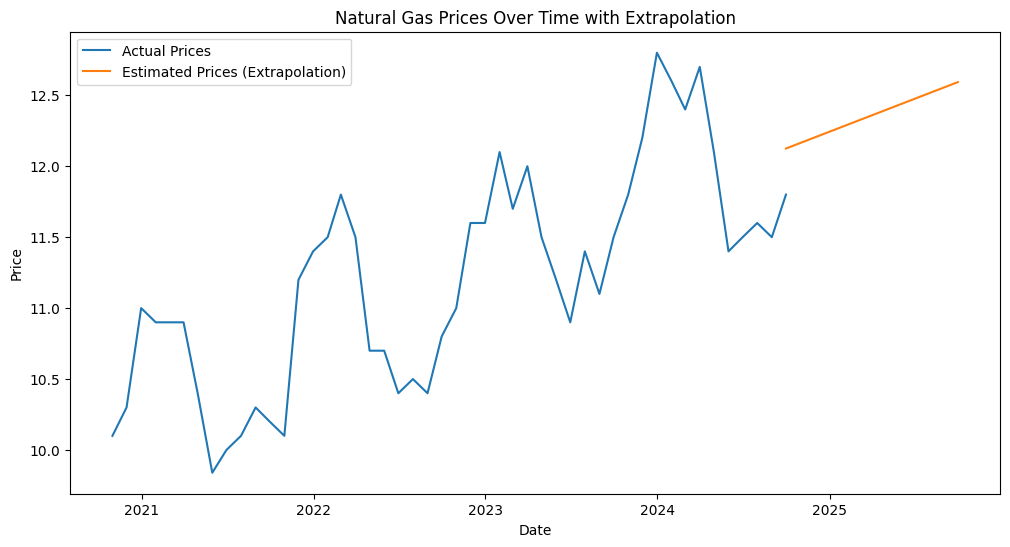

In [25]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)
    future_prices = [estimate_price(date) for date in future_dates]

# Display the extrapolated prices
plt.figure(figsize=(12, 6))
plt.plot(data['Dates'], data['Prices'], label='Actual Prices')
plt.plot(future_dates, future_prices, label='Estimated Prices (Extrapolation)')
plt.title('Natural Gas Prices Over Time with Extrapolation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
